In [2]:
%matplotlib inline

In [3]:
import os
# os.chdir("V:\Code\SpikeSorting\spikeinterface")

In [4]:
from dotenv import load_dotenv
from pathlib import Path
# load_dotenv()
dotenv_path = Path("V:\Code\SpikeSorting\spikeinterface")
load_dotenv(dotenv_path=dotenv_path)

True

In [ ]:
# os.environ["KILOSORT3_PATH"] = "V:\Code\SpikeSorting\Kilosort3"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw

## Read binary file
https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.core.read_binary

In [6]:
binary_file_path="D:\\Vincent\\vIRt57\\vIRt57_0216\\SpikeSorting\\vIRt57_0216_5732\\"
os.chdir(binary_file_path)

In [7]:
filename = "vIRt57_0216_5732_export.bin"
print(f"Reading {filename}")
recording = se.BinaryRecordingExtractor(filename, 
            sampling_frequency=30000.0,
            num_chan = 32,
            dtype='int16', #np.int16, 
            t_starts=None, 
            channel_ids=None, time_axis=0, 
            file_offset=0, gain_to_uV=None, 
            offset_to_uV=None, 
            is_filtered=None)

Reading vIRt57_0216_5732_export.bin


Plot first two second of recording


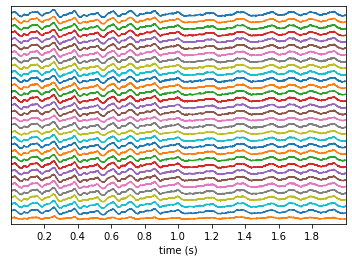

In [8]:
print(f"Plot first two second of recording")
w_ts = sw.plot_timeseries(recording, time_range=(0, 2))

## Load and assign probe

cambridgeneurotech - ASSY-37-P-2 - 32ch - 2shanks


(<matplotlib.collections.PolyCollection at 0x1da15a0be50>,
 <matplotlib.collections.PolyCollection at 0x1da15a66910>)

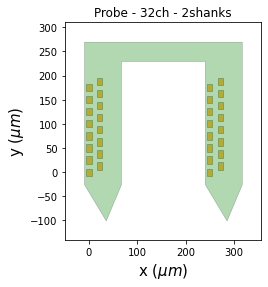

In [10]:
# #load probe
# probe = recording.get_probe()
# print(probe)

from probeinterface.plotting import plot_probe
from probeinterface import get_probe

probe = get_probe('cambridgeneurotech', 'ASSY-37-P-2')
print(probe)

probe.set_device_channel_indices(np.arange(32))
recording = recording.set_probe(probe, group_mode='by_shank')
plot_probe(recording.get_probe())

## Preprocess traces

In [11]:
# recording_cmr = recording
recording_f = st.bandpass_filter(recording, freq_min=300, freq_max=6000)
print(recording_f)
recording_cmr = st.common_reference(recording_f, reference='global', operator='median')
print(recording_cmr)

BandpassFilterRecording: 32 channels - 1 segments - 30.0kHz - 400.057s
CommonReferenceRecording: 32 channels - 1 segments - 30.0kHz - 400.057s


Plot first two second of recording after filtering and CAR


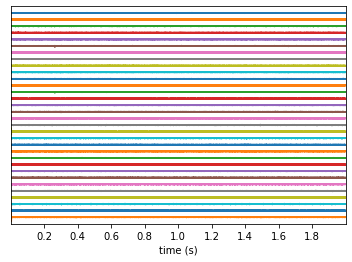

In [12]:
print(f"Plot first two second of recording after filtering and CAR")
w_ts = sw.plot_timeseries(recording_cmr, time_range=(0, 2))

## Save preprocessed file

In [14]:
# this computes and saves the recording after applying the preprocessing chain
# recording_preprocessed = recording_cmr.save(format='binary')
recording_saved = recording_cmr.save(folder="preprocessed", n_jobs=8, total_memory="2G")
print(recording_saved)

write_binary_recording with n_jobs 8  chunk_size 3906250
BinaryRecordingExtractor: 32 channels - 1 segments - 30.0kHz - 400.057s
  file_paths: ['D:\\Vincent\\vIRt57\\vIRt57_0216\\SpikeSorting\\vIRt57_0216_5732\\preprocessed\\traces_cached_seg0.raw']
